<a href="https://colab.research.google.com/github/ronaldsholt/ML_Vandy/blob/main/Ron_Holt_ML_Project_Idea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background**: Predicting cell lineage patterns in RNAseq measurments.

**Project Description**: Using representation learning as low dimentional input to higher dimentional reduction clustering tools like TSNE or UMAP to learn cell lineage. Also evaluate against traditional methods like PCA or Logistic PCA.

**Performance Metric**: Min{L2-norm/MSE}

#Basic EDA

In [ ]:
#Basic EDA Questions

#1. How many variations are there?
#2. What is the highest sequence variation ?
#3. What is the highest gene-gene correlation ?
#4. What is the class break down?

UsageError: Line magic function `%md` not found.


In [ ]:
# Calling and assigning GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# import the data from drive
path = "/content/drive/My Drive/rna_proj/data/scaled_all_specific_exp/mat.norm.scale.2000.csv" 
df = pd.read_csv(path)
df = df.drop(["Unnamed: 0"], axis = 1) 

In [ ]:
path_1 = "/content/drive/My Drive/rna_proj/data/variable.features.csv"
df_feat = pd.read_csv(path_1)

In [ ]:
# index the columns based on 2000 features 
lst = list(df_feat["x"])
lst.append("Variable") #add back the RNA seq

# index df to select only these columns using intersect
df_new = df[df.columns.intersection(lst)]

In [ ]:
df_new.head()

,Variable,Sox17,Prex2,Terf1,Mcm3,Khdrbs2,Prim2,Bag2,Ptpn18,Hs6st1,...,Nolc1,Nfkb2,Gsto1,Add3,Mxi1,Dusp5,Gm16299,Pdcd4,Plekhs1,Shtn1
0,AAACCCAGTTCCACAA,-1.393788,-0.400318,1.358433,-0.494224,-0.084449,0.199815,-0.490080,-0.298271,-0.493740,...,0.447022,0.738963,1.262297,-0.410792,1.378466,-0.422791,-0.043317,-0.170391,-0.078911,-0.195295
1,AAACCCATCACGAACT,-0.582664,-1.409803,0.177138,1.502572,-0.084449,0.554011,1.077822,1.039509,0.734416,...,0.125040,-0.603773,-0.720412,-0.980596,0.055242,-0.422791,-0.043317,-0.641089,-0.078911,-0.195295
2,AAACGAAAGCCGAATG,-0.146528,-0.251669,-0.801586,-0.310414,-0.084449,1.765205,-0.490080,-0.186529,-0.493740,...,0.318736,-0.603773,0.582429,-0.028609,-0.250889,0.645672,-0.043317,-0.641089,-0.078911,-0.195295
3,AAACGAAGTTCAAAGA,1.102187,-0.634825,1.040665,-0.772438,-0.084449,2.116643,0.681951,-0.487508,-0.493740,...,-0.638577,-0.603773,-0.720412,0.131617,0.788557,-0.422791,-0.043317,-0.136620,-0.078911,-0.195295
4,AAACGAATCCGACGGT,0.863034,0.133187,0.329966,-0.557825,-0.084449,-0.616780,-0.490080,1.091608,-0.493740,...,-1.194605,-0.603773,-0.720412,1.233833,-0.775900,1.532813,-0.043317,1.188186,-0.078911,-0.195295


In [ ]:
# Import labels, and join on Variable barcode 
# Import the 2001 cell labels
path_3 = "/content/drive/My Drive/rna_proj/data/cell.types.2001.csv"
df_labels = pd.read_csv(path_3)
df_labels = df_labels.rename(columns={"Unnamed: 0": "Variable"})
df_labeled = pd.merge(df_labels, df_new, on="Variable")

In [ ]:
df_new = df_labeled #rename
df_new.head()

,Variable,cell.type,Sox17,Prex2,Terf1,Mcm3,Khdrbs2,Prim2,Bag2,Ptpn18,...,Nolc1,Nfkb2,Gsto1,Add3,Mxi1,Dusp5,Gm16299,Pdcd4,Plekhs1,Shtn1
0,AAACCCAGTTCCACAA,cycling_capillary,-1.393788,-0.400318,1.358433,-0.494224,-0.084449,0.199815,-0.490080,-0.298271,...,0.447022,0.738963,1.262297,-0.410792,1.378466,-0.422791,-0.043317,-0.170391,-0.078911,-0.195295
1,AAACCCATCACGAACT,artery_1,-0.582664,-1.409803,0.177138,1.502572,-0.084449,0.554011,1.077822,1.039509,...,0.125040,-0.603773,-0.720412,-0.980596,0.055242,-0.422791,-0.043317,-0.641089,-0.078911,-0.195295
2,AAACGAAAGCCGAATG,cycling_capillary,-0.146528,-0.251669,-0.801586,-0.310414,-0.084449,1.765205,-0.490080,-0.186529,...,0.318736,-0.603773,0.582429,-0.028609,-0.250889,0.645672,-0.043317,-0.641089,-0.078911,-0.195295
3,AAACGAAGTTCAAAGA,cycling_capillary,1.102187,-0.634825,1.040665,-0.772438,-0.084449,2.116643,0.681951,-0.487508,...,-0.638577,-0.603773,-0.720412,0.131617,0.788557,-0.422791,-0.043317,-0.136620,-0.078911,-0.195295
4,AAACGAATCCGACGGT,artery_2,0.863034,0.133187,0.329966,-0.557825,-0.084449,-0.616780,-0.490080,1.091608,...,-1.194605,-0.603773,-0.720412,1.233833,-0.775900,1.532813,-0.043317,1.188186,-0.078911,-0.195295


# EDA Questions

In [ ]:
#1. How many variations are there?

df_new["Variable"].nunique()

1981

In [ ]:
#2. What is the highest sequence variation ?

In [ ]:
df_new["Variable"].value_counts(sort=True, ascending=False).head() # check if all unique

AAACCCAGTTCCACAA    1
GTCTCACTCTGGTGCG    1
GTCTAGACATCGGAAG    1
GTCTAGACATACAGGG    1
GTCTACCCAGGTCAAG    1
Name: Variable, dtype: int64

In [ ]:
#2.1
len(df_new["Variable"]) # by checking the length we see they are all unique

1981

In [ ]:
#3. What is highest correlation 
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    df = df.drop(["Variable"], axis=1)
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_new, 10))

Top Absolute Correlations
Hbb-bt  Hba-a1    0.895236
Cdca8   Birc5     0.894852
Nusap1  Prc1      0.890660
Hbb-bt  Hba-a2    0.890610
Hbb-bs  Hba-a1    0.883445
Cenpf   Ube2c     0.883412
Ccna2   Cdca8     0.883004
Cenpa   Ccnb2     0.880318
Hbb-bt  Hbb-bs    0.878251
Ube2c   Prc1      0.878023
dtype: float64


In [ ]:
# 4. What is the most commom cell type?

df_new["cell.type"].value_counts()

cycling_capillary    1108
artery_1              433
capillary             201
artery_2              185
vein                   54
Name: cell.type, dtype: int64

# EDA Summary:

Looks like there are all unique gene sequences; However we can observe that some gene expression is highly correleted with others. We would expect this in some degreee based on trajectory expression of the cell's differentiation patterns. Also we see the problem will be somewhat imbalanced for our multi-classification. 

#Feature Engineering

Plans: Polynomial Crossing or Reduction techniques 

#Train Test Split
 
Split will be 90/10

In [ ]:
df_new.head()

,Variable,cell.type,Sox17,Prex2,Terf1,Mcm3,Khdrbs2,Prim2,Bag2,Ptpn18,...,Nolc1,Nfkb2,Gsto1,Add3,Mxi1,Dusp5,Gm16299,Pdcd4,Plekhs1,Shtn1
0,AAACCCAGTTCCACAA,cycling_capillary,-1.393788,-0.400318,1.358433,-0.494224,-0.084449,0.199815,-0.490080,-0.298271,...,0.447022,0.738963,1.262297,-0.410792,1.378466,-0.422791,-0.043317,-0.170391,-0.078911,-0.195295
1,AAACCCATCACGAACT,artery_1,-0.582664,-1.409803,0.177138,1.502572,-0.084449,0.554011,1.077822,1.039509,...,0.125040,-0.603773,-0.720412,-0.980596,0.055242,-0.422791,-0.043317,-0.641089,-0.078911,-0.195295
2,AAACGAAAGCCGAATG,cycling_capillary,-0.146528,-0.251669,-0.801586,-0.310414,-0.084449,1.765205,-0.490080,-0.186529,...,0.318736,-0.603773,0.582429,-0.028609,-0.250889,0.645672,-0.043317,-0.641089,-0.078911,-0.195295
3,AAACGAAGTTCAAAGA,cycling_capillary,1.102187,-0.634825,1.040665,-0.772438,-0.084449,2.116643,0.681951,-0.487508,...,-0.638577,-0.603773,-0.720412,0.131617,0.788557,-0.422791,-0.043317,-0.136620,-0.078911,-0.195295
4,AAACGAATCCGACGGT,artery_2,0.863034,0.133187,0.329966,-0.557825,-0.084449,-0.616780,-0.490080,1.091608,...,-1.194605,-0.603773,-0.720412,1.233833,-0.775900,1.532813,-0.043317,1.188186,-0.078911,-0.195295


In [ ]:
from sklearn.model_selection import train_test_split
X_data = df_new

#X_train, X_test = train_test_split(X_data, test_size=0.1, random_state=4533) # 90/10
to_drop = 'Variable'
class_column = 'cell.type'
random_seed = 2435

def trainSplit(df_input):
  X_train, X_test, y_train, y_test = train_test_split(df_input.drop(columns=[class_column, to_drop]), 
                                                      df_input[class_column],
                                                      test_size=0.10, 
                                                      random_state=random_seed, 
                                                      stratify=df_input[class_column])
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = trainSplit(df_new)

In [ ]:
# View split summary
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head(2))

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head(2))

On X train: 
X train dimensions:  (1782, 2000)


,Sox17,Prex2,Terf1,Mcm3,Khdrbs2,Prim2,Bag2,Ptpn18,Hs6st1,Neurl3,...,Nolc1,Nfkb2,Gsto1,Add3,Mxi1,Dusp5,Gm16299,Pdcd4,Plekhs1,Shtn1
1230,0.038519,-0.717155,1.267643,0.892638,-0.084449,-0.61678,1.41772,-0.134361,0.319089,-0.410504,...,0.065924,0.675397,0.640004,0.013461,0.235421,-0.422791,-0.043317,-0.641089,-0.078911,-0.195295
462,-1.393788,-1.409803,-0.801586,0.792632,-0.084449,-0.61678,-0.49008,1.607018,-0.493740,-0.410504,...,-1.194605,-0.603773,-0.720412,-0.980596,-0.775900,-0.422791,-0.043317,-0.641089,-0.078911,-0.195295



On X test: 
X test dimensions:  (199, 2000)


,Sox17,Prex2,Terf1,Mcm3,Khdrbs2,Prim2,Bag2,Ptpn18,Hs6st1,Neurl3,...,Nolc1,Nfkb2,Gsto1,Add3,Mxi1,Dusp5,Gm16299,Pdcd4,Plekhs1,Shtn1
658,0.315559,-0.070155,0.893748,-0.255294,-0.084449,-0.616780,-0.49008,0.093709,-0.49374,-0.410504,...,0.947269,-0.603773,1.910763,2.368420,0.033482,-0.422791,-0.043317,-0.641089,-0.078911,-0.195295
846,0.472915,-0.304512,-0.042921,0.097544,-0.084449,1.656521,-0.49008,-0.183427,-0.49374,0.528482,...,2.032840,-0.603773,0.146246,0.605667,-0.775900,-0.422791,-0.043317,-0.117965,-0.078911,-0.195295


#Model (Network) Pipeline

Score and Evaluation will be on classification results

In [ ]:
# Model
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras import regularizers as regularizers
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy

from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os 

# input dims
input_dim = X_train.shape[1]
encoding_dim = 2000

# model
# 2k -> 10 -> 2k #
input_layer = Input(shape=(input_dim, )) 

### Encoder
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(int(1500), activation="tanh")(encoder)
encoder = Dense(int(1000), activation="tanh")(encoder)
encoder = Dense(int(500), activation="tanh")(encoder)
encoder = Dense(int(250), activation="tanh")(encoder)
encoder = Dense(int(125), activation="tanh")(encoder)
encoder = Dense(int(75), activation="tanh")(encoder)
encoder_50 = Dense(int(50), activation="tanh")(encoder)
encoder_25 = Dense(int(25), activation="tanh")(encoder_50)
encoder_f = Dense(int(10), activation="tanh")(encoder_25)

### Decoder
decoder = Dense(int(10), activation='tanh')(encoder_f)
decoder = Dense(input_dim, activation='tanh')(decoder)

### AE Model
autoencoder = Model(inputs=input_layer, outputs = decoder)

### Encoder for only encoding the Dims
encoder = Model(inputs = input_layer, outputs = encoder_f)

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_12 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_13 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_14 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_15 (Dense)            (None, 500)               500500    
                                                                 
 dense_16 (Dense)            (None, 250)               125250    
                                                                 
 dense_17 (Dense)            (None, 125)               3137

In [ ]:
encoder.summary() # model to embedd the features

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_12 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_13 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_14 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_15 (Dense)            (None, 500)               500500    
                                                                 
 dense_16 (Dense)            (None, 250)               125250    
                                                                 
 dense_17 (Dense)            (None, 125)               3137

In [ ]:
nb_epoch = 50
batch_size = 32

#X_train.drop([["Variable", "cell.type"]], axis=1, inplace=True)
#X = np.asarray(X_train).astype(np.float32) #tensor format

# Compile the model
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    #validation_data=(X_test, X_test),
                    validation_split = 0.1,
                    verbose=1)

Epoch 1/50
51/51 [==============================] - 1s 11ms/step - loss: 0.8323 - accuracy: 0.0000e+00 - val_loss: 0.8308 - val_accuracy: 0.0000e+00
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.7947 - accuracy: 0.0000e+00 - val_loss: 0.8116 - val_accuracy: 0.0000e+00
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.7807 - accuracy: 0.0000e+00 - val_loss: 0.8018 - val_accuracy: 0.0000e+00
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 0.7699 - accuracy: 0.0000e+00 - val_loss: 0.7904 - val_accuracy: 0.0000e+00
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.7611 - accuracy: 0.0000e+00 - val_loss: 0.7825 - val_accuracy: 0.0000e+00
Epoch 6/50
51/51 [==============================] - 0s 6ms/step - loss: 0.7550 - accuracy: 0.0000e+00 - val_loss: 0.7779 - val_accuracy: 0.0000e+00
Epoch 7/50
51/51 [==============================] - 0s 6ms/step - loss: 0.7517 - accuracy: 0.0000e+00 - val_los

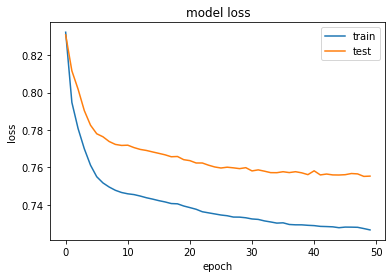

In [ ]:
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
# Evaluate Encoded Embeddings 
X_train_enc = encoder.predict(X_train) # Outpout is the embedded 10 features

print(X_train_enc.shape)
pd.DataFrame(X_train_enc).head(2)

(1782, 10)


,0,1,2,3,4,5,6,7,8,9
0,-0.964287,0.843345,0.929332,0.225513,0.846515,0.997765,0.987953,0.295815,-0.831029,0.994203
1,-0.933484,-0.920076,-0.972311,0.998147,-0.974325,-0.530764,0.165953,-0.713510,-0.555859,0.984393


In [ ]:
Encoded_Dataset = pd.concat([pd.DataFrame(X_train_enc), pd.DataFrame(y_train)], axis=1) # join data back to y_train labels ... repeat split for tesing embeddings to other models

In [ ]:
X_train_enc = pd.DataFrame(X_train_enc)
y_train = pd.DataFrame(y_train)

Encoded_Dataset = pd.concat([X_train_enc.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

In [ ]:
class_column = 'cell.type'
random_seed = 2435

def trainSplit(df_input):
  X_train, X_test, y_train, y_test = train_test_split(df_input.drop(columns=[class_column]), 
                                                      df_input[class_column],
                                                      test_size=0.25, 
                                                      random_state=random_seed, 
                                                      stratify=df_input[class_column])
  return X_train, X_test, y_train, y_test

X_train_enc, X_test_enc, y_train_enc, y_test_enc = trainSplit(Encoded_Dataset)

In [ ]:
# View split summary on embedded data
# X Train
print('On X train: ')
print('X train dimensions: ', X_train_enc.shape)
display(X_train_enc.head(2))

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test_enc.shape)
display(X_test_enc.head(2))

On X train: 
X train dimensions:  (1336, 10)


,0,1,2,3,4,5,6,7,8,9
630,0.981357,0.515569,-0.869305,-0.986681,-0.934781,0.689572,-0.944320,-0.236134,-0.794570,-0.995356
753,0.880699,-0.039184,-0.984385,0.989298,-0.999829,-0.925782,0.933354,-0.131042,0.231713,-0.503055



On X test: 
X test dimensions:  (446, 10)


,0,1,2,3,4,5,6,7,8,9
1336,0.633519,0.964175,0.973657,-0.985439,0.955080,0.506594,0.872785,0.011837,0.312252,-0.905667
1124,-0.714702,-0.568626,0.463418,-0.330469,-0.675267,0.947740,0.997874,0.898189,-0.774169,0.986338


In [ ]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 9-25-23

# Step 1: Run Lr with Embedded Dims using Grid Search; Compare to

# TODO: establish your own pipelines for the different data types
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder(drop='if_binary'))])

num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
                               ('scale_num', StandardScaler())])

#establish preprocessing pipeline by columns
preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

In [ ]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f70126750>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f700e27d0>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

In [ ]:
# TODO: set up your tuning grid 

tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [ ]:
grid_search.fit(X_train_enc, y_train_enc) # Fit on the 10 embedded dims

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(drop='if_binary'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f70126750>),
                                                                        ('num_pipe',
                                                    

In [ ]:
print(classification_report(y_test_enc, grid_search.best_estimator_.predict(X_test_enc)))

                   precision    recall  f1-score   support

         artery_1       0.83      0.93      0.87        97
         artery_2       0.75      0.14      0.24        42
        capillary       0.87      0.87      0.87        45
cycling_capillary       0.86      0.94      0.90       250
             vein       0.83      0.83      0.83        12

         accuracy                           0.85       446
        macro avg       0.83      0.74      0.74       446
     weighted avg       0.84      0.85      0.83       446



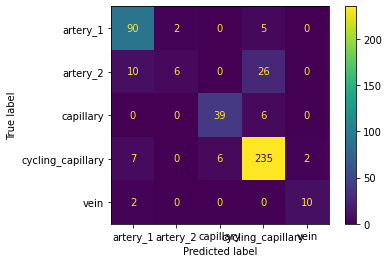

In [ ]:
cm = confusion_matrix(y_test_enc, grid_search.best_estimator_.predict(X_test_enc))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [ ]:
# Comparing to Regular Input LR
grid_search.fit(X_train, np.array(y_train).reshape(-1)) # Fit on the 2000 embedded dims
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

                   precision    recall  f1-score   support

         artery_1       0.79      0.95      0.87        44
         artery_2       0.80      0.84      0.82        19
        capillary       0.73      0.80      0.76        20
cycling_capillary       0.93      0.84      0.88       111
             vein       1.00      0.80      0.89         5

         accuracy                           0.86       199
        macro avg       0.85      0.85      0.84       199
     weighted avg       0.87      0.86      0.86       199



In [ ]:
# RF

# Random Forest 

#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', RandomForestClassifier())])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

tuning_grid = {'mdl__n_estimators' : [100, 200 ,500],
               'mdl__max_depth': [10, 15, 20] }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)\

# Comparing to Regular Input LR vs LR Embd
grid_search.fit(X_train, np.array(y_train).reshape(-1)) # Fit on the 2000 embedded dims
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f70126750>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f700e27d0>)])),
                ('mdl', RandomForestClassifier())])

                   precision    recall  f1-score   support

         artery_1       0.91      0.93      0.92        44
         artery_2       0.93      0.74      0.82        19
        capillary       0.93      0.70      0.80        20
cycling_capillary       0.90      0.97      0.94       111
             vein       1.00      0.80      0.89         5

         accuracy                           0.91       199
        macro avg       0.94      0.83      0.87       199
     weighted avg       0.91      0.91      0.91       199



In [ ]:
# Gradient Boosted

#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', GradientBoostingClassifier())])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

tuning_grid = {'mdl__n_estimators' : [100, 200 ,500],
               'mdl__max_depth': [10, 15, 20] }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 3, return_train_score=True)\

# Comparing to Regular Input LR vs LR Embd
grid_search.fit(X_train, np.array(y_train).reshape(-1)) # Fit on the 2000 embedded dims
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89026464d0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89031c4650>)])),
                ('mdl', GradientBoostingClassifier())])

Preliminary Results:

1. AE Embeddings with LR: Accuracy 85%
2. LR: Accuracy 86% ; Particularly f1 score for Artery #2 major improvement
3. RF: Accuracy 92%
4. GBM: Timed Out - Looking into

Observation, RF and GMB do better on the 2000 features. It will be worth testing the RF and GBM with embedded feature space and caompare models 1:1. 